**Submitted by**: Tuazon, Virtudez, & Lumakang

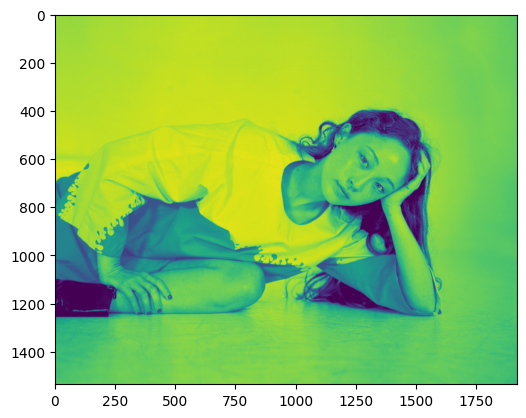

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import cv2

img_original = cv2.imread('images.jpg', 0)
plt.imshow(img_original)

In [ ]:
pixel_original=np.array([img_original])
pixel_original

array([[[200, 199, 199, ..., 173, 172, 171],
        [198, 198, 198, ..., 175, 174, 173],
        [198, 198, 199, ..., 175, 174, 173],
        ...,
        [170, 170, 170, ..., 155, 153, 150],
        [170, 169, 169, ..., 155, 155, 153],
        [173, 172, 172, ..., 156, 157, 156]]], dtype=uint8)

<ipython-input-6-05bcd8c7df75>:1: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(pixel_original.ravel(), 256, [0 ,256])


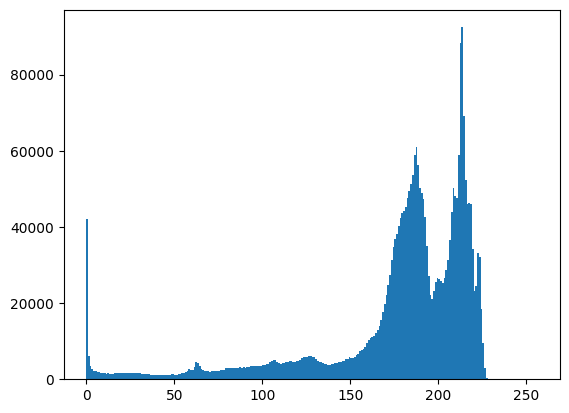

In [ ]:
plt.hist(pixel_original.ravel(), 256, [0 ,256])
plt.show()

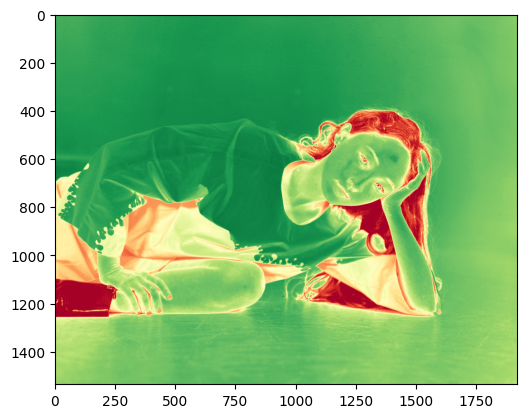

In [ ]:
img1 = img_original
plt.imshow(img1, cmap='RdYlGn')

In [ ]:
def show(img_original):
  plt.imshow(img, cmap='gray')
  plt.xticks([])
  plt.yticks([])

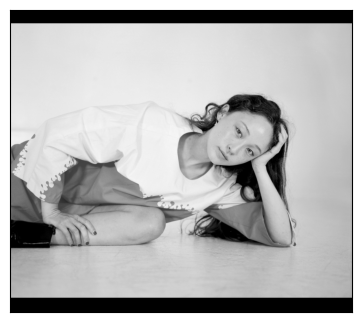

In [ ]:
h, w = img_original.shape
img = np.zeros((h+160, w), np.uint8)
img[80:-80,:] = img_original
plt.figure(figsize=(15, 5))
plt.subplot(131)
show(img)

In [ ]:
pixel_gray = np.array([img])
pixel_gray

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]], dtype=uint8)

<ipython-input-11-fa147065903a>:1: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(img.ravel(), 256, [0, 256]); plt.show()


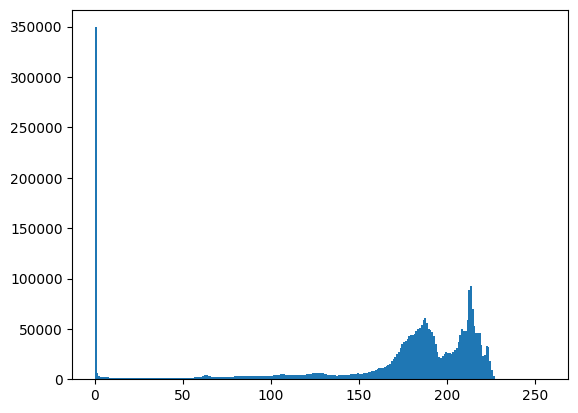

In [ ]:
plt.hist(img.ravel(), 256, [0, 256]); plt.show()

In [ ]:
pip install sewar

  Preparing metadata (setup.py) ... done
  Created wheel for sewar: filename=sewar-0.4.6-py3-none-any.whl size=11421 sha256=f46924c6183c8a0083ade0cb5a734fcf46ac25fc8b98cb2901ba8c8f2aecf8b0
  Stored in directory: /root/.cache/pip/wheels/87/f9/d9/6ec7e7b470df5ba0e317c6988ba7677a124ab220f5effea702
Successfully built sewar


In [ ]:
from sewar import full_ref
from skimage import measure, metrics
from PIL import Image
from google.colab.patches import cv2_imshow

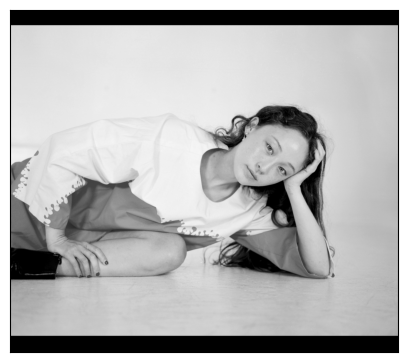

In [ ]:
mean_kernel = np.ones((3, 3), np.float32)/25

conv_mean = cv2.filter2D(img, -1, mean_kernel, borderType = cv2.BORDER_CONSTANT)
plt.figure(figsize=(5, 5))
show(conv_mean)

In [ ]:
rmse_skimg = metrics.normalized_root_mse(img, conv_mean)
print("RMSE: based on scikit-image = ", rmse_skimg)

RMSE: based on scikit-image =  0.6404169096550217


In [ ]:
mse_skimg = metrics.mean_squared_error(img, conv_mean)
print("MSE: based on scikit-image = ", mse_skimg)

MSE: based on scikit-image =  12392.665372874902


In [ ]:
psnt_skimg = metrics.peak_signal_noise_ratio(img, conv_mean, data_range=None)
print("PSNR: based on scikit-image = ", psnt_skimg)

PSNR: based on scikit-image =  7.199156378460719


In [ ]:
from skimage.metrics import structural_similarity as ssim
ssim_skimg = ssim(img, conv_mean, data_range=img.max() - img.min(), multichannel = True)
print("SSIM: based on scikit-image = ", ssim_skimg)

SSIM: based on scikit-image =  0.6350539825185962


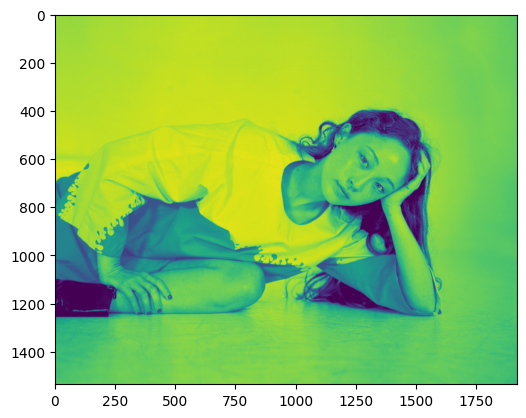

In [ ]:
img_original1 = cv2.imread('images.jpg', 0)
plt.imshow(img_original1)

In [ ]:
pixel_original=np.array([img_original])
pixel_original

array([[[200, 199, 199, ..., 173, 172, 171],
        [198, 198, 198, ..., 175, 174, 173],
        [198, 198, 199, ..., 175, 174, 173],
        ...,
        [170, 170, 170, ..., 155, 153, 150],
        [170, 169, 169, ..., 155, 155, 153],
        [173, 172, 172, ..., 156, 157, 156]]], dtype=uint8)

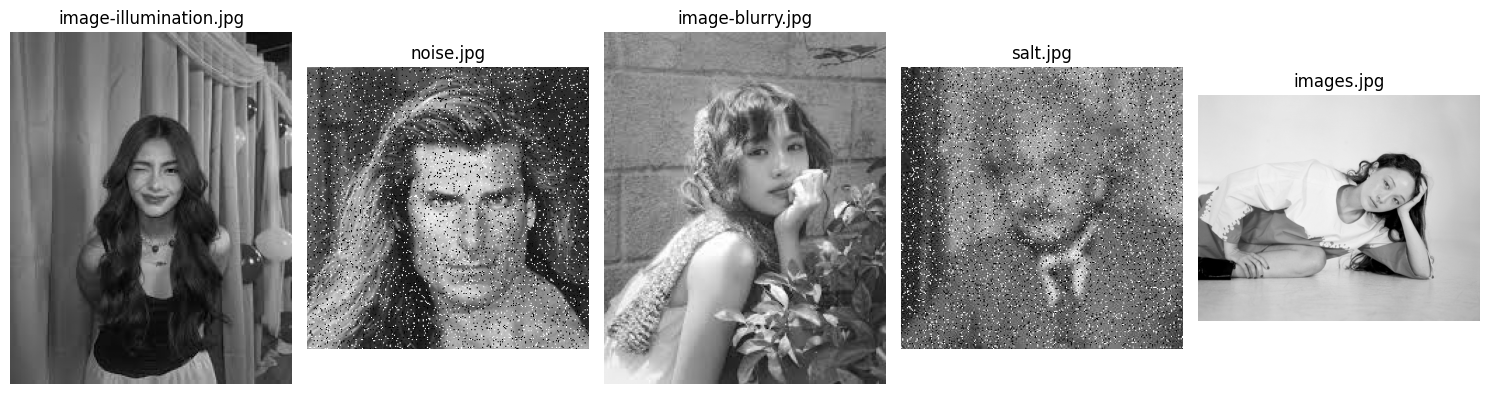

In [ ]:
#Original Images
import matplotlib.pyplot as plt
import cv2

image_files = ['image-illumination.jpg', 'noise.jpg', 'image-blurry.jpg', 'salt.jpg', 'images.jpg']

# Create a figure and subplots
fig, axes = plt.subplots(1, len(image_files), figsize=(15, 5))

# Iterate through the image files and display each image
for i, image_file in enumerate(image_files):
    try:
        img = cv2.imread(image_file, 0)  # Load image in grayscale
        if img is not None:
            axes[i].imshow(img, cmap='gray')
            axes[i].set_title(image_file)
            axes[i].axis('off')  # Hide axis ticks and labels
        else:
            axes[i].text(0.5, 0.5, f"Error loading {image_file}", ha='center', va='center')
    except Exception as e:
        axes[i].text(0.5, 0.5, f"Error: {e}", ha='center', va='center')

plt.tight_layout()  # Adjust subplot parameters for a tight layout
plt.show()


<ipython-input-23-73dc75c073c2>:23: RuntimeWarning: overflow encountered in scalar subtract
  B1, B2 = img[i, j] - zmin, img[i, j] - zmax
<ipython-input-23-73dc75c073c2>:41: RuntimeWarning: invalid value encountered in cast
  img_out[i, j] = np.mean(trimmed_window)


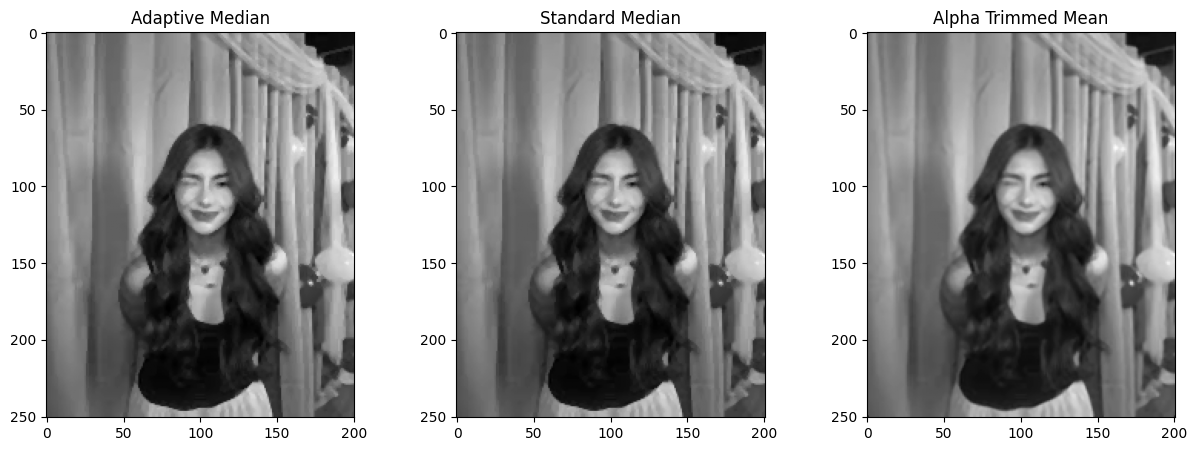

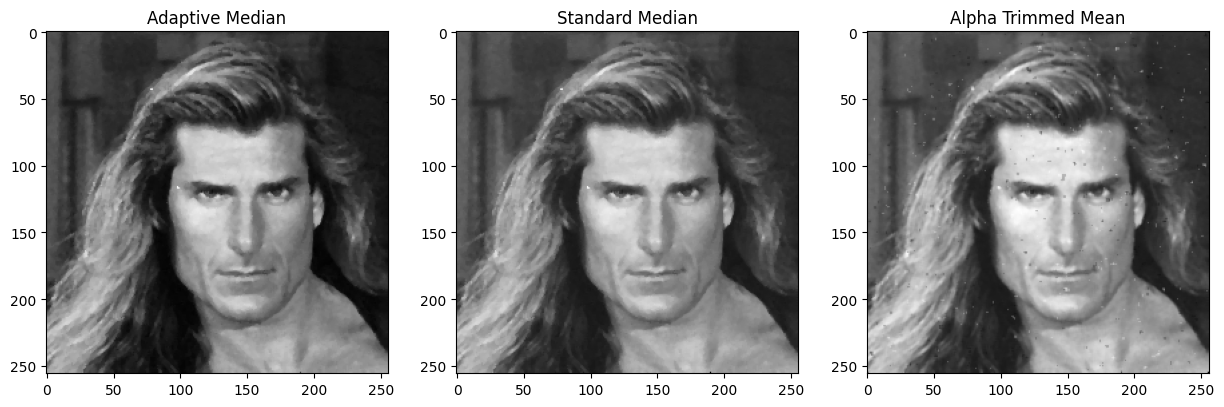

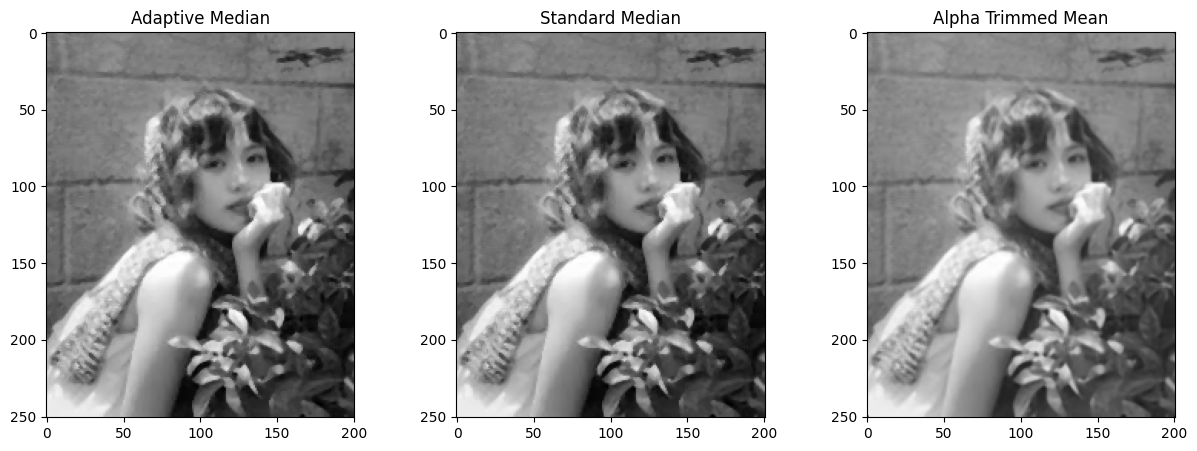

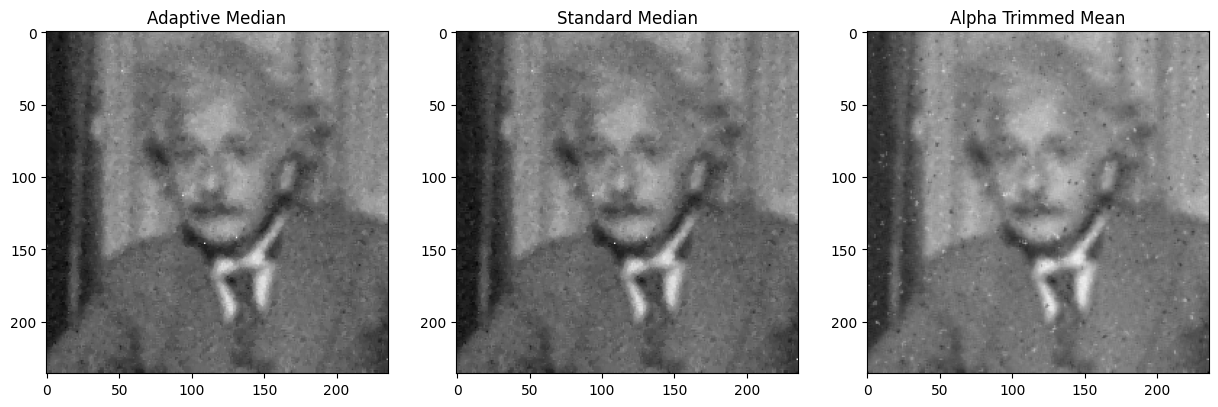

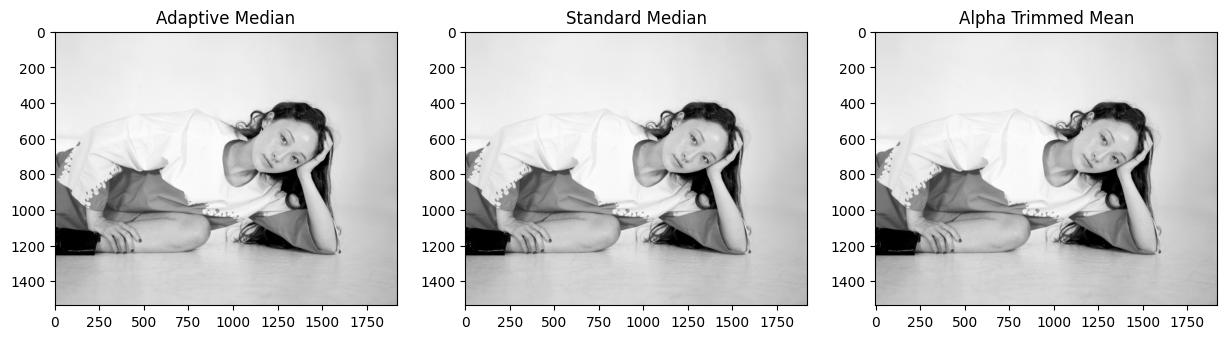

In [ ]:
#Adaptive Median, Standard Median, Alpha Trimmed Median

import cv2
import numpy as np
import matplotlib.pyplot as plt

def median_filter(img, kernel_size=3):
    return cv2.medianBlur(img, kernel_size)

def adaptive_median_filter(img, Smax=7):
    h, w = img.shape
    img_out = np.zeros_like(img)
    for i in range(h):
        for j in range(w):
            S = 3
            while S <= Smax:
                x1, y1 = max(0, i - S//2), max(0, j - S//2)
                x2, y2 = min(h, i + S//2 + 1), min(w, j + S//2 + 1)
                window = img[x1:x2, y1:y2]
                zmed = np.median(window)
                zmin, zmax = window.min(), window.max()
                A1, A2 = zmed - zmin, zmed - zmax
                B1, B2 = img[i, j] - zmin, img[i, j] - zmax
                if A1 > 0 and A2 < 0 and B1 > 0 and B2 < 0:
                    img_out[i, j] = img[i, j]
                else:
                    img_out[i, j] = zmed
                    break
                S += 2
    return img_out

def alpha_trimmed_mean_filter(img, kernel_size=3, d=2):
    h, w = img.shape
    img_out = np.zeros_like(img)
    for i in range(h):
        for j in range(w):
            x1, y1 = max(0, i - kernel_size//2), max(0, j - kernel_size//2)
            x2, y2 = min(h, i + kernel_size//2 + 1), min(w, j + kernel_size//2 + 1)
            window = img[x1:x2, y1:y2].flatten()
            trimmed_window = np.sort(window)[d:-d]
            img_out[i, j] = np.mean(trimmed_window)
    return img_out

# Image files
image_files = ['image-illumination.jpg', 'noise.jpg', 'image-blurry.jpg', 'salt.jpg', 'images.jpg']

for image_file in image_files:
    try:
        img_original = cv2.imread(image_file, 0)

        # Apply filters
        adaptive_filtered_img = adaptive_median_filter(img_original)
        standard_filtered_img = median_filter(img_original)
        alpha_trimmed_img = alpha_trimmed_mean_filter(img_original)

        # Display results
        plt.figure(figsize=(15, 5))
        plt.subplot(131), plt.imshow(adaptive_filtered_img, cmap='gray'), plt.title('Adaptive Median')
        plt.subplot(132), plt.imshow(standard_filtered_img, cmap='gray'), plt.title('Standard Median')
        plt.subplot(133), plt.imshow(alpha_trimmed_img, cmap='gray'), plt.title('Alpha Trimmed Mean')
        plt.show()

    except Exception as e:
        print(f"Error processing {image_file}: {e}")
